## Style guides (remove before submitting)
1. PEP8 for python: https://peps.python.org/pep-0008
2. for jupyter notebook: https://github.com/spacetelescope/style-guides/blob/master/guides/jupyter-notebooks.md

## General TODO (remove before submitting)
1. Maybe add Raise errors?

## DOCSTRING convention example (according to Pep8) (remove before submitting)
**Short docstrings:**\
"""This is an example of a short docstring."""\
\
**Long docstrings:**\
"""\
Short description of the function (may be next to quotations above).\
\
Arguments:\
    parametername: What the parameter is\
    parametername2: what the parameter is\
\
Returns:\
    This is a description of what the function returns.\
"""

# Gillespie's Algorithm and Stochasticity in a SIR model

This code implements a Gillespie's algorithm (GA) to a SIR model where stochasticity is introduced.  

#### SIR Model
A SIR model is a description of the behavioral patterns of infectious disseases with the help of a set of Ordinary Differential Equations (ODEs). Depending on the dissease that's being modeled, there are different types of SIR models that can be implemented. The model that we use is divided into three categories:

1.  Susceptible; A group within the population that is susceptible to infection with the dissease.
2.  Infected; A group within the population that is currently infected with the dissease
3.  Recovered; A group that has recovered from an infection, we assume they cannot be infected again

The rate with which people transfer between these categories is described by parameters. The parameters we use are called the infection rate (beta) and recovery rate (gamma) that describe the flow of susceptible to infected (beta) and of infected to recovered (gamma). Additionally, birth and death rates are introduced to describe the effect of 'fresh' additions to the population to the susceptible pool and a chance of mortality at each category.

The set of ODEs describe how the populations within these categories change over time due to the applied parameters. 

### Gillespie's Algorithm
A Gillespie's Algorithm (GA) stochastically simulates discrete events from the equation it is applied to. In our application we used the so-called First Reaction Method where the rate at which an event occurs is passed to calculate how long it takes for the event to occur. To this determination, a random variable is attached to add stochasticity. The event that takes the least amount of time to occur is then executed, all other events are negated. The time that passed is updated to include the time it took for the event to occur and a new event is generated. This is repeated until the predetermined end-point is reached (such as an established end-time).

- TO DO: 
    - add ODE functions
    - add GA function 







## Imports

The following libraries where imported for further use in the code

* tabulate for ...
* numpy for use in numerical computing
* matplotlib for visualisation of data in plots
* pandas for ...
* fractions for ...
* solve_ivp for numerical integration of the SIR ODE functions
* bisect for ...

- TO DO:
    - Add explanations
    - Remove unused imports

In [2]:
#from tabulate import tabulate
#import pandas as pd
#from fractions import Fraction

import bisect
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

## Define All Possible Events (test merge)


In [3]:
def sir_update(S, I, R, N, key):
    """Updates and returns SIRN populations according to given key."""

    if key == 'infection':
        S -= 1
        I += 1
        return S, I, R, N
    
    elif key == 'recovery': 
        R += 1
        I -= 1
        return S, I, R, N
    
    elif key == 'birth':
        S += 1
        N += 1
        return S, I, R, N
    
    elif key == 'death S':
        S -= 1
        N -= 1
        return S, I, R, N
    
    elif key == 'death I':
        I -= 1
        N -= 1
        return S, I, R, N
    
    elif key == 'death R':
        R -= 1
        N -= 1
        return S, I, R, N

## Implement GSP 

- Add a way to control noise level (gsp function)
    - Larger N reduces noise
    - average results on multiple simulations
    - reduce noise after simultaion: remove high frequency fluctuations

In [4]:
def gsp(sir, beta, gamma, mu, end):
    """
    Simulates disease spread using GA First Reaction Method.

    Arguments:
        sir: List of S, I, R and N populations.
        beta: Infection rate.
        gamma: Recovery rate.
        mu: Natural birth and death rate.
        end: Signifies end point of simulation in time.

    Returns:
        A tuple containing a list of time events and population data 
        over time.
    """


    S, I, R, N = sir
    t = 0
    
    t_events = []
    y_data = []
    
    while t <= end:
        
        # This queue collects the delta_t of each event at time t + delta_t
        event_queue = {}

        if S > 0 and I > 0 and N > 0:
            dt_infection = np.random.exponential(1/(beta*S*I/N))
            event_queue['infection'] = dt_infection

        if I > 0:
            dt_recovery = np.random.exponential(1/(gamma*I))
            event_queue['recovery'] = dt_recovery

        if N > 0:
            dt_birth = np.random.exponential(1/(mu*N))
            event_queue['birth'] = dt_birth

        if S > 0:
            dt_death_S = np.random.exponential(1/(mu*S))
            event_queue['death S'] = dt_death_S

        if I > 0:
            dt_death_I = np.random.exponential(1/(mu*I))
            event_queue['death I'] = dt_death_I

        if R > 0:
            dt_death_R = np.random.exponential(1/(mu*R))
            event_queue['death R'] = dt_death_R

        # Select the event with the smallest delta_t, this event will be carried out, the rest is omitted
        sorted_queue = dict(sorted(event_queue.items(), 
                                   key=lambda item: item[1]))
        first_event_key, first_event_time = list(sorted_queue.items())[0]
        
        # Updates the current time with delta_t
        t += first_event_time
        t_events.append(t)

        # Handle each type of event
        S, I, R, N = sir_update(S, I, R, N, first_event_key)

        y_data.append([S, I, R])
    
    return (t_events, y_data)

## Run Stochastic Simulation

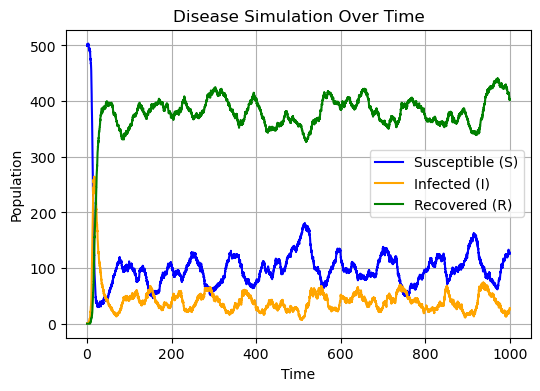

In [5]:
def run_simulation(sir, beta, gamma, mu, t_span):
    """
    Runs the GA stochastic disease simulation and plots the results.

    Arguments:
        sir: List of S, I, R and N populations.
        beta: Infection rate.
        gamma: Recovery rate.
        mu: Natural birth and death rate.
        t_span: Maximum duration of the GA simulation.
    """

    t_events, y_data = gsp(sir, beta, gamma, mu, t_span)

    y_data = np.array(y_data)

    S = y_data[:, 0]
    I = y_data[:, 1]
    R = y_data[:, 2]

    plt.figure(figsize=(6, 4))
    plt.plot(t_events, S, label='Susceptible (S)', color='blue')
    plt.plot(t_events, I, label='Infected (I)', color='orange')
    plt.plot(t_events, R, label='Recovered (R)', color='green')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Disease Simulation Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


# Parameters
N = 500
S = N - 1
I = N - S
R = 0
sir = [S, I, R, N]

beta = 0.6
gamma = 0.1
mu = 0.01
parameters = [beta, gamma, mu]

t_span = 1000

run_simulation(sir, beta, gamma, mu, t_span)

## Run Deterministic Model

To do:

- Add similarity score between stochastic and derministic model.

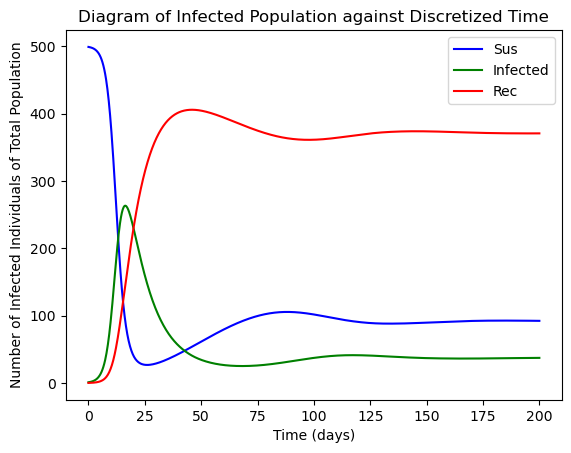

In [6]:
def calc_ode(t, sir, parameters, N):
    """Calculates and returns the change in sir populations over time."""
    
    beta, gamma, mu = parameters
    S, I, R = sir

    dSdt = (mu*N) - ((beta*S*I)/N) - (mu*S)
    dIdt = ((beta*S*I)/N) - (gamma*I) - (mu*I)
    dRdt = (gamma*I) - (mu*R)

    return [dSdt, dIdt, dRdt]


def plot_sir_det(time, S, I, R):
    """Plots the deterministic sir model."""

    plt.plot(time, S, label='Sus', color='b')
    plt.plot(time, I, label='Infected', color='g')
    plt.plot(time, R, label='Rec', color='r')
    plt.xlabel('Time (days)')
    plt.ylabel('Number of Infected Individuals of Total Population')
    plt.legend()
    plt.title('Diagram of Infected Population against Discretized Time')
    plt.show()


def run_sir_det(sir, parameters, N, t_span):
    """Runs the deterministic sir model with passed initial values.
    
    Arguments:
        sir: List of S, I, R and N populations.
        parameters: list containg recovery, infection and 
                    birth/death rate
        N: Total initial population
        t_span: Timespan in which the model is ran

    Returns: 
        Timespan used to model sir and population sizes of S, I and R.
    """

    # Time measurement with 1000 samples, equally spaced between 0 and t_span
    time = np.linspace(0, t_span, 1000)

    sir_integration = solve_ivp(calc_ode, [time[0], time[-1]], sir, 
                                args=(parameters, N), t_eval=time)
    S, I, R = sir_integration.y

    plot_sir_det(time, S, I, R)

    return time, S, I, R


# Parameters for infection, recovery and death rate
beta = 0.6
gamma = 0.1
mu = 0.01
parameters = [beta, gamma, mu]

# Intitial population densities
N = 500
S0 = N - 1
I0 = N - S0
R0 = 0
sir_det = [S0, I0, R0]

t_span = 200

# The sem-colon prevents the array from being printed in cell
run_sir_det(sir_det, parameters, N, t_span);

## Look at variance

- Plot results

- Delete print statements (not yet)

Beta/gamma pairs: [(0.410758347329102, 0.15219098886007876), (0.8816486645063204, 0.5196991818606244), (0.2834849349629973, 0.4548345032684429), (0.7116118681563617, 0.33125642270519845), (0.6656164910724965, 0.23973587416181685), (0.48460212237863887, 0.5052819671829298), (0.8130500514559751, 0.22035130798502225), (0.509348764523389, 0.6398839493533106), (0.5263737939964187, 0.2967091925359723), (0.39914876366438756, 0.19403629862299798), (0.555316838753149, 0.27864488104444957), (0.192940713989604, 0.8596875570275835), (0.30443343235661163, 0.27821979904045235), (0.6601999071764061, 0.4236624938193009), (0.5472575409528383, 0.8850626707511436), (0.5423472008465874, 0.6580551691475486), (0.11998151083513786, 0.12993282471480658), (0.17044428083017343, 0.11857589731180625), (0.1265041688609374, 0.7182102170018407), (0.8050319801898627, 0.6739135697764989), (0.5345117097999758, 0.7177215372217551), (0.4008891535563356, 0.570611208013628), (0.42489230008479895, 0.3143675929276625), (0.52

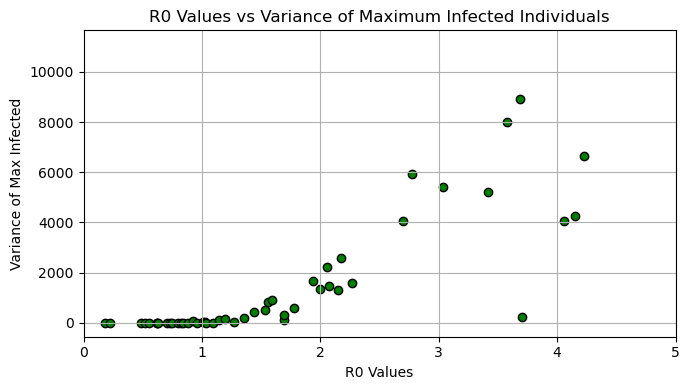

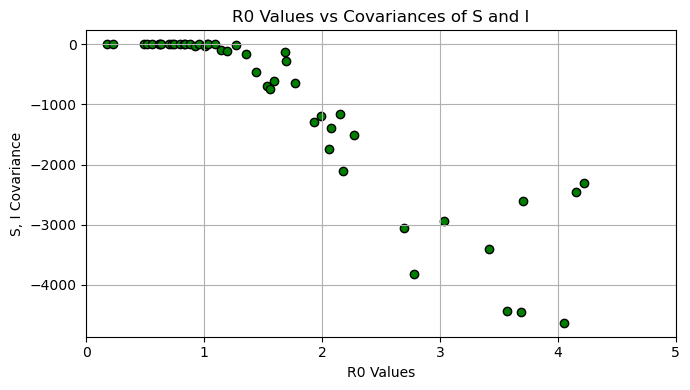

In [7]:
np.random.seed(35)


def generate_parameters(num_samples, lower_ratio=0.45, upper_ratio=0.55, 
                        beta_range=(0.1, 0.9), gamma_range=(0.1, 0.9)):
    """
    Generates beta and gamma pairs randomly to calculate their R0 values. 
    Ensures ratio of R0 values  falls within specified bounds.
    
    Arguments:
        num_samples: Total number of beta/gamma pairs to generate.
        lower_ratio: Lower bound for the ratio of R0 values.
        upper_ratio: Upper bound for the ratio of R0 values.
        beta_range: Range for generated beta values.
        gamma_range: Range for generated gamma values.
    
    Returns:
        A list of the beta gamma pairs and a list of the generated 
        R0 values.
    """
    
    # Initialize ratio of R0 values smaller and larger than 1.
    ratio = 0

    while ratio < lower_ratio or ratio > upper_ratio:

        # only same random generator
        betas = np.random.uniform(beta_range[0], beta_range[1], num_samples)
        gammas = np.random.uniform(gamma_range[0], gamma_range[1], num_samples)

        beta_gamma_pairs = list(zip(betas, gammas))
        R0_vals = [beta / gamma for beta, gamma in beta_gamma_pairs]

        # Calculate the ratio of R0 values < 1 and > 1
        num_below_one = np.sum(np.array(R0_vals) < 1)
        num_above_one = np.sum(np.array(R0_vals) > 1)
        ratio = num_below_one/(num_above_one + 1e-10)  # Avoid division by zero (this is hardcoding, another way?)

    R0_vals
    print("Beta/gamma pairs: " + str(beta_gamma_pairs))
    print("R0 values: " + str(R0_vals))
    print("Ratio: " + str(ratio))
    
    return beta_gamma_pairs, R0_vals


def parameter_sweep(sir, pairs, mu, num_runs):
    """
    Performs a parameter sweep over the SIR model simulation to analyze 
    the impact of varying beta and gamma values on the maximum number of 
    infected individuals.

    Arguments:
        sir: List of S, I, R and N populations.
        pairs: List of beta-gamma tuples to test in SIR model.
        mu: Natural birth and death rate.
        num_runs: Number of simulation runs per beta-gamma pair tuples.
    
    Returns:
        A list of variances and covariances of the maximum infected 
        values for each beta-gamma pair.
    """
    
    variances = []
    covariances = []

    for beta, gamma in pairs:
        
        # For variance
        max_I_vals = []

        # For covariance
        S_vals= []
        I_vals = []
        
        # Run simulation n times for each (beta, gamma) pair.
        for _ in range(num_runs):

            result = gsp(sir, beta, gamma, mu, t_span)
            y_data = np.array(result[1])

            S = y_data[:, 0]
            I = y_data[:, 1]
            R = y_data[:, 2]

            S_vals.extend(S)
            I_vals.extend(I)

            # Extract max I value from each run.
            max_I_vals.append(np.max(I))

        # Variance for each (beta, gamma) pair after n runs is recorded.
        variances.append(np.var(max_I_vals))
        covariance_matrix = np.cov(S_vals, I_vals)
        covariances.append(covariance_matrix[0, 1])

    return variances, covariances


def plot_R0_vs_variance(R0_vals, variances):
    """
    Plots R0 values against variances of maximum infected individuals.
    """

    plt.figure(figsize=(7, 4))
    plt.scatter(R0_vals, variances, color='green', edgecolor='black')

    plt.xlabel('R0 Values')
    plt.ylabel('Variance of Max Infected')
    plt.title('R0 Values vs Variance of Maximum Infected Individuals')
    #plt.axhline(0, color='gray', linestyle='--')  # Optional: Add a horizontal line at y=0
    plt.grid(True)
    plt.xlim(0, 5)
    plt.tight_layout()
    plt.show()


def plot_R0_vs_covariances(R0_vals, covariances):
    """
    Plots R0 values against covariances of S and I across different 
    parameter pairs.
    """

    plt.figure(figsize=(7, 4))
    plt.scatter(R0_vals, covariances, color='green', edgecolor='black')

    plt.xlabel('R0 Values')
    plt.ylabel('S, I Covariance')
    plt.title('R0 Values vs Covariances of S and I')
    #plt.axhline(0, color='gray', linestyle='--')  # Optional: Add a horizontal line at y=0
    plt.grid(True)
    plt.xlim(0, 5)
    plt.tight_layout()
    plt.show()


# Define number of beta/gamma pairs.
num_pairs = 50

# Define number of runs per beta/gamma pair.
num_runs = 10

# Generate Parameters
sample_pairs, sample_R0_vals = generate_parameters(num_pairs)

# Calculate variances
variances, covariances = parameter_sweep(sir, sample_pairs, mu, num_runs)

# Combine and sort by R0 for variance analysis
var_combined = list(zip(sample_R0_vals, variances))
sorted_var_combined = sorted(var_combined)
sorted_R0_vals, sorted_variances = zip(*sorted_var_combined)

# Combine and sort by R0 for variance analysis
covar_combined = list(zip(sample_R0_vals, covariances))
sorted_covar_combined = sorted(covar_combined)
sorted_R0_vals, sorted_covariances = zip(*sorted_covar_combined)


plot_R0_vs_variance(sorted_R0_vals, sorted_variances)
plot_R0_vs_covariances(sorted_R0_vals, sorted_covariances)

## Calculate the Mean accross multiple runs 
TO DO: change deterministic to roll with same parameters

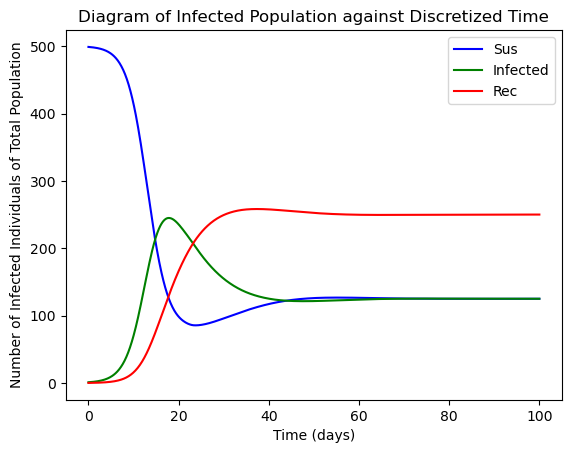

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


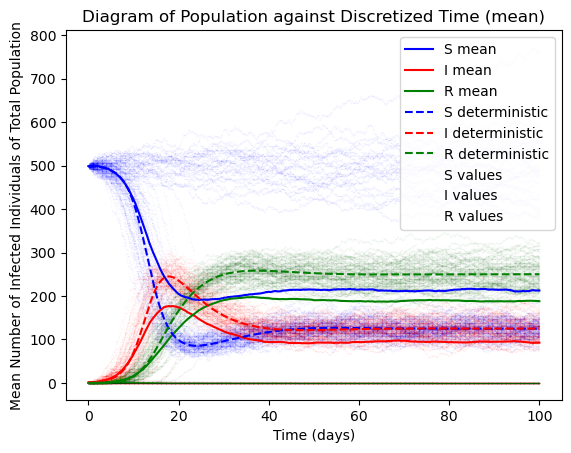

In [8]:
def gsp_mean(runs, t_span, sir, parameters):
    """
    """

    beta, gamma, mu = parameters

    # calculates how large the steps should be in between time steps    
    t_steps = t_span/ 1000
 
    # end excludes end so include t_steps. steps are spacing between values
    fixed_steps = np.round(np.arange(0, t_span + t_steps, t_steps), 2)

    # store data from run at those fixed time steps 
    results = {
        'time': fixed_steps.tolist(),
        'S': {round(step, 4): [] for step in fixed_steps},
        'I': {round(step, 4): [] for step in fixed_steps},
        'R': {round(step, 4): [] for step in fixed_steps},
        'N': {round(step, 4): [] for step in fixed_steps}
        }
    
    results_mean = {
        'S': [],
        'I': [],
        'R': [],
        'N': []
        }
    
    results_stdev = {
        'S': [],
        'I': [],
        'R': [],
        'N': []
        }

    for run in range(runs):
        # get data from run
        t_events , y_data = gsp(sir, beta, gamma, mu, t_span)

        # finds for which values of steps in fixed_steps what the closest (lower) is in t_events.
        for steps in fixed_steps:

            #round the steps similarly to the dictionary
            steps = round(steps, 4)

            #returns where a value should be inserted
            position_value = bisect.bisect_right(t_events, steps)

            #want lowest closest value position, but position can be 0 or higher than max (t_span)
            if position_value > 0:
                position_value -= 1

            S, I, R = y_data[position_value]

            # Appends the corresponding values to the correct place on the timeline
            results['S'][steps].append(S)
            results['I'][steps].append(I)
            results['R'][steps].append(R)
            results['N'][steps].append(S + I + R)

    #access every fixed step
    # access all entries for S, I , R and N in the fixed steps and store mean values in a dictionary
    for steps in fixed_steps:
        
        results_mean['S'].append(np.mean(results['S'][steps]))
        results_mean['I'].append(np.mean(results['I'][steps]))
        results_mean['R'].append(np.mean(results['R'][steps]))
        results_mean['N'].append(np.mean(results['N'][steps]))

        results_stdev['S'].append(np.std(results['S'][steps]))
        results_stdev['I'].append(np.std(results['I'][steps]))
        results_stdev['R'].append(np.std(results['R'][steps]))
        results_stdev['N'].append(np.std(results['N'][steps]))
    
    return results, results_mean, results_stdev


#mean plus deterministic plus stdev
def plot_mean(results, results_mean, results_stdev, sir):
   
    S, I, R, N = sir
    sir_det = [S, I, R]

    S_mean = results_mean['S']
    I_mean = results_mean['I']
    R_mean = results_mean['R']
    time = results['time']

    time_2, S, I, R = run_sir_det(sir_det, parameters, N, t_span)
    
    plt.plot(time, S_mean, label='S mean', color='blue')
    plt.plot(time, I_mean, label='I mean', color='red')
    plt.plot(time, R_mean, label='R mean', color='green')
    plt.plot(time_2, S, label='S deterministic', color='blue', 
             linestyle='dashed')
    plt.plot(time_2, I, label='I deterministic', color='red', 
             linestyle='dashed')
    plt.plot(time_2, R, label='R deterministic', color='green', 
             linestyle='dashed')

    time_steps_S = []
    time_steps_I = []
    time_steps_R = []
    S_values = []
    I_values = []
    R_values = []

    for time_step, values in results['S'].items():
        for value in values:
            time_steps_S.append(time_step)
            S_values.append(value)
    
    for time_step, values in results['I'].items():
        for value in values:
            time_steps_I.append(time_step)
            I_values.append(value)

    for time_step, values in results['R'].items():
        for value in values:
            time_steps_R.append(time_step)
            R_values.append(value)

    plt.scatter(time_steps_S, S_values, alpha=0.03, linewidths=0, 
                color='blue', marker='o', label='S values', s=1)
    plt.scatter(time_steps_I, I_values, alpha=0.03, linewidths=0, 
                color='red', marker='o', label='I values', s=1)
    plt.scatter(time_steps_R, R_values, alpha=0.03, linewidths=0, 
                color='green', marker='o', label='R values', s=1)

    plt.xlabel('Time (days)')
    plt.ylabel('Mean Number of Infected Individuals of Total Population')
    plt.legend()
    plt.title('Diagram of Population against Discretized Time (mean)')
    plt.show()

    return


# Initial conditions with a population of 500 people
N = 500
S = N - 1
I = N - S0
R = 0
sir = [S, I, R, N]

beta = 0.6
gamma = 0.1
mu = 0.05
parameters = [beta, gamma, mu]

t_span = 100

runs = 100

results, results_mean, results_stdev = gsp_mean(runs, t_span, sir, parameters)
plot_mean(results, results_mean, results_stdev, sir)

## R0 vs Extinction Events

Beta/gamma pairs: [(0.11000000000000001, 0.1), (0.11795918367346941, 0.1), (0.1259183673469388, 0.1), (0.1338775510204082, 0.1), (0.14183673469387756, 0.1), (0.14979591836734696, 0.1), (0.15775510204081633, 0.1), (0.16571428571428573, 0.1), (0.17367346938775513, 0.1), (0.1816326530612245, 0.1), (0.1895918367346939, 0.1), (0.1975510204081633, 0.1), (0.20551020408163267, 0.1), (0.21346938775510207, 0.1), (0.22142857142857145, 0.1), (0.22938775510204082, 0.1), (0.2373469387755102, 0.1), (0.24530612244897962, 0.1), (0.25326530612244896, 0.1), (0.2612244897959184, 0.1), (0.26918367346938776, 0.1), (0.27714285714285714, 0.1), (0.2851020408163265, 0.1), (0.29306122448979594, 0.1), (0.3010204081632653, 0.1), (0.30897959183673473, 0.1), (0.3169387755102041, 0.1), (0.3248979591836735, 0.1), (0.3328571428571429, 0.1), (0.3408163265306123, 0.1), (0.34877551020408165, 0.1), (0.3567346938775511, 0.1), (0.36469387755102045, 0.1), (0.3726530612244898, 0.1), (0.3806122448979592, 0.1), (0.38857142857142

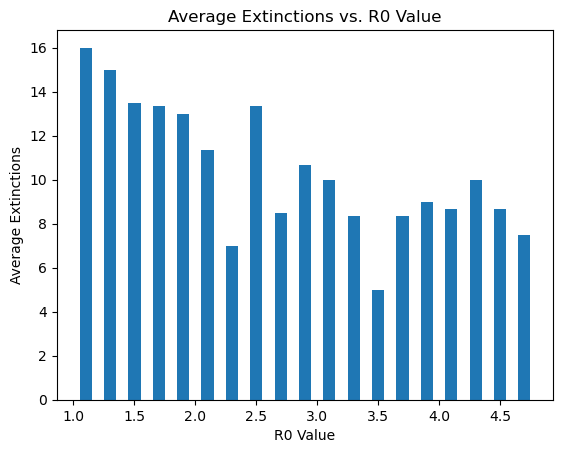

In [9]:
def generate_large_R0(num_samples, R0_range=(1.1, 5), gamma_value=0.1):
    """
    Generates systematic beta and gamma pairs such that the R0 values range from 1.1 to 5.
    
    Parameters:
        num_samples (int): Number of beta/gamma pairs to generate.
        R0_range (tuple): Range for R0 values.
        gamma_value (float): Fixed value for gamma (to systematically calculate beta).
    
    Returns:
        list: List of (beta, gamma) pairs.
        list: List of R0 values.
    """
    # Generate evenly spaced R0 values within the specified range
    R0_vals = np.linspace(R0_range[0], R0_range[1], num_samples)
    
    # Use a fixed gamma value, and calculate corresponding beta = R0 * gamma
    gammas = np.full(num_samples, gamma_value)
    betas = R0_vals*gammas  # beta = R0 * gamma

    beta_gamma_pairs = list(zip(betas, gammas))

    # Optional: print for debugging
    print("Beta/gamma pairs: " + str(beta_gamma_pairs))
    print("R0 values: " + str(R0_vals))
    
    return beta_gamma_pairs, R0_vals


def count_R0_extinctions(pairs, num_runs):

    extinction_list = []

    for beta, gamma in pairs:
    
        num_extinctions = 0
    
        for _ in range(num_runs):


                result = gsp(sir, beta, gamma, mu, t_span)
                y_data = np.array(result[1])

                I = y_data[:, 1]

                mean = np.mean(I)

                print(mean)


                if mean < 1e-2:  # Treat any value below a small threshold as extinction:
                    
                    num_extinctions += 1

                
        
        extinction_list.append(num_extinctions)

    
    return extinction_list
        

def plot_results_R0(num_pairs, num_runs):
    
    sample_pairs, sample_R0_vals = generate_large_R0(num_pairs)
    R0_extinctions = count_R0_extinctions(sample_pairs, num_runs)

    # Sort R0 values and corresponding extinctions
    R0_extinction_pairs = list(zip(sample_R0_vals, R0_extinctions))
    sorted_R0_extinction_pairs = sorted(R0_extinction_pairs)

    sorted_R0_vals, sorted_extinctions = zip(*sorted_R0_extinction_pairs)

    # Convert to numpy arrays for easy indexing
    sorted_R0_vals = np.array(sorted_R0_vals)
    sorted_extinctions = np.array(sorted_extinctions)

    # Bin the R0 values (for example, in intervals of 0.1)
    bins = np.arange(min(sorted_R0_vals), max(sorted_R0_vals), 0.2)
    bin_indices = np.digitize(sorted_R0_vals, bins)

    # Average extinctions within each bin
    binned_extinctions = [np.mean(sorted_extinctions[bin_indices == i]) 
                          for i in range(1, len(bins))]

    # Plotting
    plt.bar(bins[:-1], binned_extinctions, width=0.1)
    plt.xlabel("R0 Value")
    plt.ylabel("Average Extinctions")
    plt.title("Average Extinctions vs. R0 Value")
    plt.show()


num_pairs = 20
num_runs = 50
mu = 0.0001

plot_results_R0(num_pairs, num_runs)

## N vs Extinction Events

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


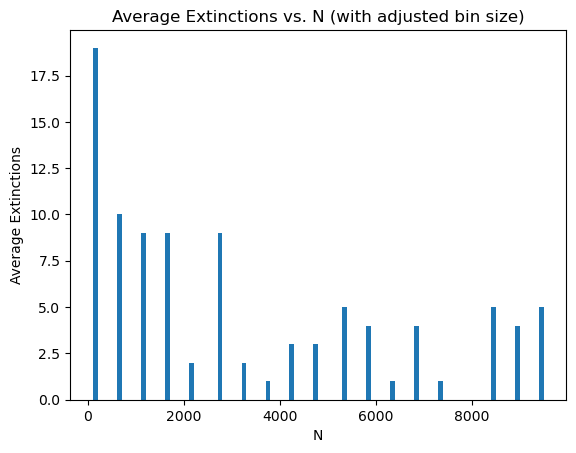

In [13]:
def generate_populations(num_pops):
    populations = []
    
    # Evenly distribute populations from 100 to 10,000
    S_0 = np.linspace(100, 10000, num_pops)

    for i in range(num_pops):
        S = S_0[i]
        I = 1
        R = 0
        N = S + I
        sir = (S, I, R, N)
        populations.append(sir)
    
    return populations


def count_N_extinctions(num_pops, num_runs):
    populations = generate_populations(num_pops)
    extinction_list = []

    for pop in populations:
        num_extinctions = 0
        for _ in range(num_runs):
            result = gsp(pop, beta, gamma, mu, t_span)
            y_data = np.array(result[1])
            I = y_data[:, 1]
            mean = np.mean(I)

            # Treat any value below a small threshold as extinction:
            if mean < 1e-3:
                num_extinctions += 1
        
        extinction_list.append(num_extinctions)
    
    return extinction_list


def plot_results_N(num_pops, num_runs):
    sample_pops = generate_populations(num_pops)
    N_extinctions = count_N_extinctions(num_pops, num_runs)

    # Sort population sizes and corresponding extinctions
    N_extinction_pairs = list(zip(sample_pops, N_extinctions))
    sorted_N_extinction_pairs = sorted(N_extinction_pairs)

    sorted_pops, sorted_extinctions = zip(*sorted_N_extinction_pairs)

    # Convert to numpy arrays for easy indexing
    sorted_pops = np.array(sorted_pops)
    sorted_extinctions = np.array(sorted_extinctions)

    # Bin the population sizes more sensibly with a larger bin size
    bins = np.arange(min(sorted_pops[:, 0]), max(sorted_pops[:, 0]) + 1, 300)  # Increase bin size to 1000
    bin_indices = np.digitize(sorted_pops[:, 0], bins)

    # Average extinctions within each bin
    binned_extinctions = [np.mean(sorted_extinctions[bin_indices == i]) for i in range(1, len(bins))]

    # Plotting
    plt.bar(bins[:-1], binned_extinctions, width=np.diff(bins), align='edge')
    plt.xlabel("N")
    plt.ylabel("Average Extinctions")
    plt.title("Average Extinctions vs. N (with adjusted bin size)")
    plt.show()


# Parameters
beta = 0.4
gamma = 0.1
mu = 0.0001

num_pops = 20
num_runs = 50

plot_results_N(num_pops, num_runs)

## Extinctions as a Function of R0 and N

In [11]:
def plot_results_R0_N(num_pairs, num_pops, num_runs):
    # Generate R0 pairs
    sample_pairs, sample_R0_vals = generate_large_R0(num_pairs)

    # Generate populations
    populations = generate_populations(num_pops)

    # Count extinctions for each combination of R0 and N
    extinction_data = []

    for (beta, gamma), R0 in zip(sample_pairs, sample_R0_vals):
        for pop in populations:
            num_extinctions = 0
            
            for _ in range(num_runs):
                result = gsp(pop, beta, gamma, mu, t_span)
                y_data = np.array(result[1])
                I = y_data[:, 1]
                mean = np.mean(I)
                
                if mean < 1e-2:  # Treat any value below a small threshold as extinction
                    num_extinctions += 1

            # Store results: (N, R0, num_extinctions)
            N = pop[0] + pop[1] + pop[2]  # S + I + R
            extinction_data.append((N, R0, num_extinctions))

    # Convert to numpy array for easier indexing
    extinction_data = np.array(extinction_data)

    # Separate the data for plotting
    N_values = extinction_data[:, 0]
    R0_values = extinction_data[:, 1]
    extinction_counts = extinction_data[:, 2]

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(N_values, R0_values, extinction_counts, c=extinction_counts, cmap='viridis')
    
    ax.set_xlabel('Population Size (N)')
    ax.set_ylabel('R0 Value')
    ax.set_zlabel('Number of Extinctions')
    ax.set_title('Interaction between R0 and N in Extinctions')
    
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Number of Extinctions')

    plt.show()

# Parameters
num_pairs = 50
num_pops = 20
num_runs = 20
mu = 0.0001

# Execute the plotting function
plot_results_R0_N(num_pairs, num_pops, num_runs)

Beta/gamma pairs: [(0.11000000000000001, 0.1), (0.11795918367346941, 0.1), (0.1259183673469388, 0.1), (0.1338775510204082, 0.1), (0.14183673469387756, 0.1), (0.14979591836734696, 0.1), (0.15775510204081633, 0.1), (0.16571428571428573, 0.1), (0.17367346938775513, 0.1), (0.1816326530612245, 0.1), (0.1895918367346939, 0.1), (0.1975510204081633, 0.1), (0.20551020408163267, 0.1), (0.21346938775510207, 0.1), (0.22142857142857145, 0.1), (0.22938775510204082, 0.1), (0.2373469387755102, 0.1), (0.24530612244897962, 0.1), (0.25326530612244896, 0.1), (0.2612244897959184, 0.1), (0.26918367346938776, 0.1), (0.27714285714285714, 0.1), (0.2851020408163265, 0.1), (0.29306122448979594, 0.1), (0.3010204081632653, 0.1), (0.30897959183673473, 0.1), (0.3169387755102041, 0.1), (0.3248979591836735, 0.1), (0.3328571428571429, 0.1), (0.3408163265306123, 0.1), (0.34877551020408165, 0.1), (0.3567346938775511, 0.1), (0.36469387755102045, 0.1), (0.3726530612244898, 0.1), (0.3806122448979592, 0.1), (0.38857142857142

KeyboardInterrupt: 

## Stochastic Resonance

In [ ]:
# ratio of output deterministic vs stochastic on y-axis
    # do we want stochastic mean (+error st dev) or singular output
    # peak intensity measure time or how many infected

# x-axis shows difference in parameter 
    # which parameter?

## Mean for different N populations

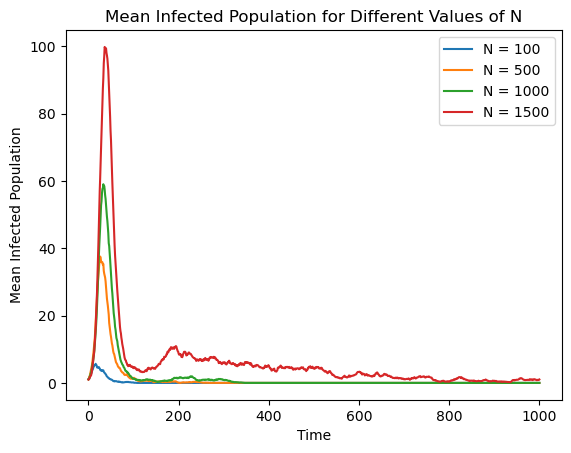

In [16]:
def plot_means_for_different_Ns(N_values, num_runs, t_span, parameters):
    for N in N_values:
        # Generate initial conditions based on N
        sir = (N - 1, 1, 0, N)  # S, I, R, N

        # Get results for the current N
        _, results_mean, _ = gsp_mean(num_runs, t_span, sir, parameters)

        # Plot the mean infected population over time
        plt.plot(results_mean['I'], label=f'N = {N}')

    plt.xlabel('Time')
    plt.ylabel('Mean Infected Population')
    plt.title('Mean Infected Population for Different Values of N')
    plt.legend()
    plt.show()

N_values = [100, 500, 1000, 1500]  # Example N values
num_runs = 50
t_span = 1000
beta = 0.4
gamma = 0.2
mu = 0.01

parameters = (beta, gamma, mu)

plot_means_for_different_Ns(N_values, num_runs, t_span, parameters)